In [202]:
import pandas as pd
import pandas._testing as tm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def unpivot(frame):
    N, K = frame.shape
    data = {
        "value": frame.to_numpy().ravel("F"),
        "variable": np.asarray(frame.columns).repeat(N),
        "date": np.tile(np.asarray(frame.index), K),
    }
    return pd.DataFrame(data, columns=["date", "variable", "value"])

In [6]:
df = unpivot(tm.makeTimeDataFrame(3))
df

,date,variable,value
0,2000-01-03,A,-0.789621
1,2000-01-04,A,0.307529
2,2000-01-05,A,0.565430
3,2000-01-03,B,1.143894
4,2000-01-04,B,-1.226889
5,2000-01-05,B,0.624725
6,2000-01-03,C,-0.438036
7,2000-01-04,C,-1.649706
8,2000-01-05,C,-1.158613
9,2000-01-03,D,0.350713


In [7]:
f = df['variable'] == "A"
df.loc[f]

,date,variable,value
0,2000-01-03,A,-0.789621
1,2000-01-04,A,0.307529
2,2000-01-05,A,0.565430


In [8]:
pivoted = df.pivot(index="date", columns="variable", values="value")
pivoted

variable,A,B,C,D
date,,,,
2000-01-03,-0.789621,1.143894,-0.438036,0.350713
2000-01-04,0.307529,-1.226889,-1.649706,-0.640096
2000-01-05,0.565430,0.624725,-1.158613,0.886883


In [16]:
pivoted["A"][0]

-0.7896213173935138

In [17]:
df["value2"] = df["value"] * 2

In [18]:
df

,date,variable,value,value2
0,2000-01-03,A,-0.789621,-1.579243
1,2000-01-04,A,0.307529,0.615057
2,2000-01-05,A,0.565430,1.130861
3,2000-01-03,B,1.143894,2.287787
4,2000-01-04,B,-1.226889,-2.453777
5,2000-01-05,B,0.624725,1.249451
6,2000-01-03,C,-0.438036,-0.876072
7,2000-01-04,C,-1.649706,-3.299412
8,2000-01-05,C,-1.158613,-2.317226
9,2000-01-03,D,0.350713,0.701427


In [19]:
pivoted = df.pivot(index="date", columns="variable")
pivoted


value                                  value2            \
variable           A         B         C         D         A         B   
date                                                                     
2000-01-03 -0.789621  1.143894 -0.438036  0.350713 -1.579243  2.287787   
2000-01-04  0.307529 -1.226889 -1.649706 -0.640096  0.615057 -2.453777   
2000-01-05  0.565430  0.624725 -1.158613  0.886883  1.130861  1.249451   

                                
variable           C         D  
date                            
2000-01-03 -0.876072  0.701427  
2000-01-04 -3.299412 -1.280192  
2000-01-05 -2.317226  1.773766

In [21]:
pivoted['value2']

variable,A,B,C,D
date,,,,
2000-01-03,-1.579243,2.287787,-0.876072,0.701427
2000-01-04,0.615057,-2.453777,-3.299412,-1.280192
2000-01-05,1.130861,1.249451,-2.317226,1.773766


In [22]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [23]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one     0.832144 -0.654453
      two    -0.594593 -0.157936
baz   one    -0.861097  0.245022
      two     0.638153 -1.427784
foo   one     0.938645 -0.474135
      two    -0.154301 -0.934933
qux   one     1.443552 -1.065174
      two     0.254721 -1.254781

In [24]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.832144 -0.654453
      two    -0.594593 -0.157936
baz   one    -0.861097  0.245022
      two     0.638153 -1.427784

In [25]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.832144
               B   -0.654453
       two     A   -0.594593
               B   -0.157936
baz    one     A   -0.861097
               B    0.245022
       two     A    0.638153
               B   -1.427784
dtype: float64

In [26]:
stacked.unstack()

A         B
first second                    
bar   one     0.832144 -0.654453
      two    -0.594593 -0.157936
baz   one    -0.861097  0.245022
      two     0.638153 -1.427784

In [27]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.832144 -0.594593
      B -0.654453 -0.157936
baz   A -0.861097  0.638153
      B  0.245022 -1.427784

In [28]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.832144 -0.861097
       B -0.654453  0.245022
two    A -0.594593  0.638153
       B -0.157936 -1.427784

In [29]:
stacked.unstack("second")

second        one       two
first                      
bar   A  0.832144 -0.594593
      B -0.654453 -0.157936
baz   A -0.861097  0.638153
      B  0.245022 -1.427784

In [30]:
stacked.unstack("first")

first          bar       baz
second                      
one    A  0.832144 -0.861097
       B -0.654453  0.245022
two    A -0.594593  0.638153
       B -0.157936 -1.427784

In [36]:
columns = pd.MultiIndex.from_tuples(
    [
        ("Yellow", "cat", "long"),
        ("Black", "cat", "long"),
        ("Yellow", "dog", "short"),
        ("Black", "dog", "short"),
    ],
    names=["color", "animal", "hair_length"],
)

columns

MultiIndex([('Yellow', 'cat',  'long'),
            ( 'Black', 'cat',  'long'),
            ('Yellow', 'dog', 'short'),
            ( 'Black', 'dog', 'short')],
           names=['color', 'animal', 'hair_length'])

In [37]:
df = pd.DataFrame(np.random.randn(4, 4), columns=columns)
df

color,Yellow,Black,Yellow,Black
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,-0.596943,-0.146367,0.044947,1.797354
1,0.074183,0.108212,0.472121,1.080253
2,-0.408971,-0.453067,-0.150814,-0.599227
3,-0.857367,0.268852,1.007782,0.542415


In [38]:
df.stack(level=["animal", "hair_length"])

color                    Black    Yellow
  animal hair_length                    
0 cat    long        -0.146367 -0.596943
  dog    short        1.797354  0.044947
1 cat    long         0.108212  0.074183
  dog    short        1.080253  0.472121
2 cat    long        -0.453067 -0.408971
  dog    short       -0.599227 -0.150814
3 cat    long         0.268852 -0.857367
  dog    short        0.542415  1.007782

In [41]:
df.stack(level=[1, 2])

color                    Black    Yellow
  animal hair_length                    
0 cat    long        -0.146367 -0.596943
  dog    short        1.797354  0.044947
1 cat    long         0.108212  0.074183
  dog    short        1.080253  0.472121
2 cat    long        -0.453067 -0.408971
  dog    short       -0.599227 -0.150814
3 cat    long         0.268852 -0.857367
  dog    short        0.542415  1.007782

In [39]:
df.stack(level=["animal", "color"])

hair_length          long     short
  animal color                     
0 cat    Black  -0.146367       NaN
         Yellow -0.596943       NaN
  dog    Black        NaN  1.797354
         Yellow       NaN  0.044947
1 cat    Black   0.108212       NaN
         Yellow  0.074183       NaN
  dog    Black        NaN  1.080253
         Yellow       NaN  0.472121
2 cat    Black  -0.453067       NaN
         Yellow -0.408971       NaN
  dog    Black        NaN -0.599227
         Yellow       NaN -0.150814
3 cat    Black   0.268852       NaN
         Yellow -0.857367       NaN
  dog    Black        NaN  0.542415
         Yellow       NaN  1.007782

In [40]:
df.stack(level=["animal"])

color           Black              Yellow          
hair_length      long     short      long     short
  animal                                           
0 cat       -0.146367       NaN -0.596943       NaN
  dog             NaN  1.797354       NaN  0.044947
1 cat        0.108212       NaN  0.074183       NaN
  dog             NaN  1.080253       NaN  0.472121
2 cat       -0.453067       NaN -0.408971       NaN
  dog             NaN -0.599227       NaN -0.150814
3 cat        0.268852       NaN -0.857367       NaN
  dog             NaN  0.542415       NaN  1.007782

In [42]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat"),
        ("B", "dog"),
        ("B", "cat"),
        ("A", "dog"),
    ],
    names=["exp", "animal"],
)


In [43]:
index = pd.MultiIndex.from_product(
    [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
)
df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.375657 -0.587075 -1.579066 -0.023824
      two     0.216056  0.165542  0.561146 -0.746482
baz   one    -0.494231 -0.298895 -0.959721 -1.111398
      two     0.629987 -0.855019 -1.496111  0.440739
foo   one     0.611614  1.422667  0.752285 -0.077045
      two     0.086848  1.200350 -2.590267  0.848023
qux   one    -0.029939  0.360570  0.425770  1.595430
      two     0.140803 -1.525667  2.325391 -0.205127

In [44]:
df2 = df.iloc[[0, 1, 2, 4, 5, 7]]
df2

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.375657 -0.587075 -1.579066 -0.023824
      two     0.216056  0.165542  0.561146 -0.746482
baz   one    -0.494231 -0.298895 -0.959721 -1.111398
foo   one     0.611614  1.422667  0.752285 -0.077045
      two     0.086848  1.200350 -2.590267  0.848023
qux   two     0.140803 -1.525667  2.325391 -0.205127

In [45]:
df2.stack("exp")

animal                 cat       dog
first second exp                    
bar   one    A   -1.375657 -0.023824
             B   -1.579066 -0.587075
      two    A    0.216056 -0.746482
             B    0.561146  0.165542
baz   one    A   -0.494231 -1.111398
             B   -0.959721 -0.298895
foo   one    A    0.611614 -0.077045
             B    0.752285  1.422667
      two    A    0.086848  0.848023
             B   -2.590267  1.200350
qux   two    A    0.140803 -0.205127
             B    2.325391 -1.525667

In [49]:
df2.stack().unstack()

exp                  A                   B          
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.375657 -0.023824 -1.579066 -0.587075
      two     0.216056 -0.746482  0.561146  0.165542
baz   one    -0.494231 -1.111398 -0.959721 -0.298895
foo   one     0.611614 -0.077045  0.752285  1.422667
      two     0.086848  0.848023 -2.590267  1.200350
qux   two     0.140803 -0.205127  2.325391 -1.525667

In [50]:
df2.stack("animal")

exp                         A         B
first second animal                    
bar   one    cat    -1.375657 -1.579066
             dog    -0.023824 -0.587075
      two    cat     0.216056  0.561146
             dog    -0.746482  0.165542
baz   one    cat    -0.494231 -0.959721
             dog    -1.111398 -0.298895
foo   one    cat     0.611614  0.752285
             dog    -0.077045  1.422667
      two    cat     0.086848 -2.590267
             dog     0.848023  1.200350
qux   two    cat     0.140803  2.325391
             dog    -0.205127 -1.525667

In [51]:
df3 = df.iloc[[0, 1, 4, 7], [1, 2]]
df3

exp                  B          
animal             dog       cat
first second                    
bar   one    -0.587075 -1.579066
      two     0.165542  0.561146
foo   one     1.422667  0.752285
qux   two    -1.525667  2.325391

In [52]:
df3.unstack()

exp            B                              
animal       dog                 cat          
second       one       two       one       two
first                                         
bar    -0.587075  0.165542 -1.579066  0.561146
foo     1.422667       NaN  0.752285       NaN
qux          NaN -1.525667       NaN  2.325391

In [53]:
df3.unstack(fill_value=0.0)

exp            B                              
animal       dog                 cat          
second       one       two       one       two
first                                         
bar    -0.587075  0.165542 -1.579066  0.561146
foo     1.422667  0.000000  0.752285  0.000000
qux     0.000000 -1.525667  0.000000  2.325391

In [54]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.375657 -0.587075 -1.579066 -0.023824
      two     0.216056  0.165542  0.561146 -0.746482
baz   one    -0.494231 -0.298895 -0.959721 -1.111398
      two     0.629987 -0.855019 -1.496111  0.440739
foo   one     0.611614  1.422667  0.752285 -0.077045
      two     0.086848  1.200350 -2.590267  0.848023
qux   one    -0.029939  0.360570  0.425770  1.595430
      two     0.140803 -1.525667  2.325391 -0.205127

In [55]:
df[:3]

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.375657 -0.587075 -1.579066 -0.023824
      two     0.216056  0.165542  0.561146 -0.746482
baz   one    -0.494231 -0.298895 -0.959721 -1.111398

In [56]:
df[:3].unstack(0)

exp            A                   B                                       A  \
animal       cat                 dog                 cat                 dog   
first        bar       baz       bar       baz       bar       baz       bar   
second                                                                         
one    -1.375657 -0.494231 -0.587075 -0.298895 -1.579066 -0.959721 -0.023824   
two     0.216056       NaN  0.165542       NaN  0.561146       NaN -0.746482   

exp               
animal            
first        baz  
second            
one    -1.111398  
two          NaN

In [57]:
df2

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.375657 -0.587075 -1.579066 -0.023824
      two     0.216056  0.165542  0.561146 -0.746482
baz   one    -0.494231 -0.298895 -0.959721 -1.111398
foo   one     0.611614  1.422667  0.752285 -0.077045
      two     0.086848  1.200350 -2.590267  0.848023
qux   two     0.140803 -1.525667  2.325391 -0.205127

In [58]:
df2.unstack(1)

exp            A                   B                                       A  \
animal       cat                 dog                 cat                 dog   
second       one       two       one       two       one       two       one   
first                                                                          
bar    -1.375657  0.216056 -0.587075  0.165542 -1.579066  0.561146 -0.023824   
baz    -0.494231       NaN -0.298895       NaN -0.959721       NaN -1.111398   
foo     0.611614  0.086848  1.422667  1.200350  0.752285 -2.590267 -0.077045   
qux          NaN  0.140803       NaN -1.525667       NaN  2.325391       NaN   

exp               
animal            
second       two  
first             
bar    -0.746482  
baz          NaN  
foo     0.848023  
qux    -0.205127

In [59]:
cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    }
)
cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [60]:
cheese.melt(id_vars=["first", "last"])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [63]:
melted = cheese.melt(id_vars=["first", "last"], var_name="quantity")
melted

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [89]:
melted['name'] = melted['first'] + ' ' + melted['last']
melted

,first,last,quantity,value,name
0,John,Doe,height,5.5,John Doe
1,Mary,Bo,height,6.0,Mary Bo
2,John,Doe,weight,130.0,John Doe
3,Mary,Bo,weight,150.0,Mary Bo


In [90]:
pivoted = melted.pivot(index="name",  columns="quantity", values="value")
pivoted

quantity,height,weight
name,,
John Doe,5.5,130.0
Mary Bo,6.0,150.0


In [92]:
m =cheese.melt(id_vars=["first", "last"])
m

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [94]:
m= m.set_index(['first', 'last'])
m

,,variable,value
first,last,,
John,Doe,height,5.5
Mary,Bo,height,6.0
John,Doe,weight,130.0
Mary,Bo,weight,150.0


In [97]:
p= m.pivot(columns="variable", values="value")
p

,variable,height,weight
first,last,,
John,Doe,5.5,130.0
Mary,Bo,6.0,150.0


In [98]:
index = pd.MultiIndex.from_tuples([("person", "A"), ("person", "B")])
cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    },
    index=index,
)
cheese

first last  height  weight
person A  John  Doe     5.5     130
       B  Mary   Bo     6.0     150

In [99]:
cheese.melt(id_vars=["first", "last"])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [104]:
cheese.melt(id_vars=["first", "last"], ignore_index=False)

first last variable  value
person A  John  Doe   height    5.5
       B  Mary   Bo   height    6.0
       A  John  Doe   weight  130.0
       B  Mary   Bo   weight  150.0

In [113]:
cheese.melt(id_vars=["first", "last"], ignore_index=False).stack()[:4]

person  A  first         John
           last           Doe
           variable    height
           value          5.5
dtype: object

In [114]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.375657 -0.587075 -1.579066 -0.023824
      two     0.216056  0.165542  0.561146 -0.746482
baz   one    -0.494231 -0.298895 -0.959721 -1.111398
      two     0.629987 -0.855019 -1.496111  0.440739
foo   one     0.611614  1.422667  0.752285 -0.077045
      two     0.086848  1.200350 -2.590267  0.848023
qux   one    -0.029939  0.360570  0.425770  1.595430
      two     0.140803 -1.525667  2.325391 -0.205127

In [115]:
df.stack()

exp                         A         B
first second animal                    
bar   one    cat    -1.375657 -1.579066
             dog    -0.023824 -0.587075
      two    cat     0.216056  0.561146
             dog    -0.746482  0.165542
baz   one    cat    -0.494231 -0.959721
             dog    -1.111398 -0.298895
      two    cat     0.629987 -1.496111
             dog     0.440739 -0.855019
foo   one    cat     0.611614  0.752285
             dog    -0.077045  1.422667
      two    cat     0.086848 -2.590267
             dog     0.848023  1.200350
qux   one    cat    -0.029939  0.425770
             dog     1.595430  0.360570
      two    cat     0.140803  2.325391
             dog    -0.205127 -1.525667

In [120]:
df.stack().mean(1)

first  second  animal
bar    one     cat      -1.477361
               dog      -0.305450
       two     cat       0.388601
               dog      -0.290470
baz    one     cat      -0.726976
               dog      -0.705147
       two     cat      -0.433062
               dog      -0.207140
foo    one     cat       0.681949
               dog       0.672811
       two     cat      -1.251710
               dog       1.024187
qux    one     cat       0.197916
               dog       0.978000
       two     cat       1.233097
               dog      -0.865397
dtype: float64

In [121]:
df.stack().mean(1).unstack()

animal             cat       dog
first second                    
bar   one    -1.477361 -0.305450
      two     0.388601 -0.290470
baz   one    -0.726976 -0.705147
      two    -0.433062 -0.207140
foo   one     0.681949  0.672811
      two    -1.251710  1.024187
qux   one     0.197916  0.978000
      two     1.233097 -0.865397

In [122]:
s1 = df.stack().mean(1).unstack()
s1

animal             cat       dog
first second                    
bar   one    -1.477361 -0.305450
      two     0.388601 -0.290470
baz   one    -0.726976 -0.705147
      two    -0.433062 -0.207140
foo   one     0.681949  0.672811
      two    -1.251710  1.024187
qux   one     0.197916  0.978000
      two     1.233097 -0.865397

In [128]:
s2 = s1.stack(0)
s2

first  second  animal
bar    one     cat      -1.477361
               dog      -0.305450
       two     cat       0.388601
               dog      -0.290470
baz    one     cat      -0.726976
               dog      -0.705147
       two     cat      -0.433062
               dog      -0.207140
foo    one     cat       0.681949
               dog       0.672811
       two     cat      -1.251710
               dog       1.024187
qux    one     cat       0.197916
               dog       0.978000
       two     cat       1.233097
               dog      -0.865397
dtype: float64

In [132]:
s3= pd.DataFrame(s2, columns=['value'])
s3

value
first second animal          
bar   one    cat    -1.477361
             dog    -0.305450
      two    cat     0.388601
             dog    -0.290470
baz   one    cat    -0.726976
             dog    -0.705147
      two    cat    -0.433062
             dog    -0.207140
foo   one    cat     0.681949
             dog     0.672811
      two    cat    -1.251710
             dog     1.024187
qux   one    cat     0.197916
             dog     0.978000
      two    cat     1.233097
             dog    -0.865397

In [156]:
s3.query('value > value.mean()')



value
first second animal          
bar   two    cat     0.388601
foo   one    cat     0.681949
             dog     0.672811
      two    dog     1.024187
qux   one    cat     0.197916
             dog     0.978000
      two    cat     1.233097

In [158]:
f = s3 >= s3.mean()
f

value
first second animal       
bar   one    cat     False
             dog     False
      two    cat      True
             dog     False
baz   one    cat     False
             dog     False
      two    cat     False
             dog     False
foo   one    cat      True
             dog      True
      two    cat     False
             dog      True
qux   one    cat      True
             dog      True
      two    cat      True
             dog     False

In [164]:
s3[f]


value
first second animal          
bar   one    cat          NaN
             dog          NaN
      two    cat     0.388601
             dog          NaN
baz   one    cat          NaN
             dog          NaN
      two    cat          NaN
             dog          NaN
foo   one    cat     0.681949
             dog     0.672811
      two    cat          NaN
             dog     1.024187
qux   one    cat     0.197916
             dog     0.978000
      two    cat     1.233097
             dog          NaN

In [166]:
s4= s3[f].dropna()
s4

value
first second animal          
bar   two    cat     0.388601
foo   one    cat     0.681949
             dog     0.672811
      two    dog     1.024187
qux   one    cat     0.197916
             dog     0.978000
      two    cat     1.233097

In [169]:
s5= s4.unstack()
s5

value          
animal             cat       dog
first second                    
bar   two     0.388601       NaN
foo   one     0.681949  0.672811
      two          NaN  1.024187
qux   one     0.197916  0.978000
      two     1.233097       NaN

In [172]:
s5.unstack()

value                              
animal       cat                 dog          
second       one       two       one       two
first                                         
bar          NaN  0.388601       NaN       NaN
foo     0.681949       NaN  0.672811  1.024187
qux     0.197916  1.233097  0.978000       NaN

In [173]:
import datetime


In [174]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)
df

,A,B,C,D,E,F
0,one,A,foo,-1.552990,0.032351,2013-01-01
1,one,B,foo,0.702183,0.889530,2013-02-01
2,two,C,foo,-0.449929,0.411943,2013-03-01
3,three,A,bar,0.052011,-0.418638,2013-04-01
4,one,B,bar,-1.533880,-0.758598,2013-05-01
5,one,C,bar,-0.486443,-0.700213,2013-06-01
6,two,A,foo,-1.707445,0.598537,2013-07-01
7,three,B,foo,-0.333869,0.264113,2013-08-01
8,one,C,foo,0.959423,1.228527,2013-09-01
9,one,A,bar,-0.796899,-0.865302,2013-10-01


In [175]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.209073 -0.654285
      B -0.715707  0.058154
      C  0.437539 -0.067783
three A  0.027763       NaN
      B       NaN  0.302776
      C  0.402262       NaN
two   A       NaN -1.021855
      B  0.294288       NaN
      C       NaN -0.386715

In [176]:
pd.pivot_table(df, values="D", index=["A", "C"], columns=["B"])

B                 A         B         C
A     C                                
one   bar -0.209073 -0.715707  0.437539
      foo -0.654285  0.058154 -0.067783
three bar  0.027763       NaN  0.402262
      foo       NaN  0.302776       NaN
two   bar       NaN  0.294288       NaN
      foo -1.021855       NaN -0.386715

In [179]:
pd.pivot_table(df, values="E", index=["B", "C"], columns=["A"])

A           one     three       two
B C                                
A bar  0.002476 -0.251416       NaN
  foo  0.081547       NaN  0.173142
B bar -0.805004       NaN -0.000562
  foo -0.360565 -0.651248       NaN
C bar -0.412504 -0.631859       NaN
  foo  0.274447       NaN  1.058646

In [180]:
pd.pivot_table(df, values="D", index=["B"], columns=["A", "C"], aggfunc=np.sum)

A       one               three                 two          
C       bar       foo       bar       foo       bar       foo
B                                                            
A -0.418146 -1.308570  0.055526       NaN       NaN -2.043709
B -1.431414  0.116308       NaN  0.605552  0.588577       NaN
C  0.875077 -0.135565  0.804525       NaN       NaN -0.773430

In [181]:
pd.pivot_table(
    df, values=["D", "E"],
    index=["B"],
    columns=["A", "C"],
    aggfunc=np.sum,
)


D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A -0.418146 -1.308570  0.055526       NaN       NaN -2.043709  0.004952   
B -1.431414  0.116308       NaN  0.605552  0.588577       NaN -1.610009   
C  0.875077 -0.135565  0.804525       NaN       NaN -0.773430 -0.825007   

                                                     
A               three                 two            
C       foo       bar       foo       bar       foo  
B                                                    
A  0.163093 -0.502833       NaN       NaN  0.346283  
B -0.721130       NaN -1.302496 -0.001124       NaN  
C  0.548894 -1.263719       NaN       NaN  2.117292

In [182]:
pd.pivot_table(df[["A", "B", "C", "D", "E"]], index=["A", "B"], columns=["C"])

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.209073 -0.654285  0.002476  0.081547
      B -0.715707  0.058154 -0.805004 -0.360565
      C  0.437539 -0.067783 -0.412504  0.274447
three A  0.027763       NaN -0.251416       NaN
      B       NaN  0.302776       NaN -0.651248
      C  0.402262       NaN -0.631859       NaN
two   A       NaN -1.021855       NaN  0.173142
      B  0.294288       NaN -0.000562       NaN
      C       NaN -0.386715       NaN  1.058646

#### freq = 'M' means montly frecuency; 'Q', Quarter 

In [186]:
pd.pivot_table(df, values="D", index=pd.Grouper(freq="Q", key="F"), columns="C")

C,bar,foo
F,,
2013-03-31,NaN,-0.327615
2013-06-30,-0.083468,NaN
2013-09-30,NaN,-0.262287
2013-12-31,0.162493,NaN


In [187]:
df = pd.read_csv('./Captacion29122022.csv', encoding='ISO-8859-1')
df.head(5)

,SUC,SOCIO,CUENTA,Producto,F. Inicio,F. Venc,% Int,SALDO
0,1,1,2,AHORRO CORRIENTE,19/01/18,NaN,5.0,556.87
1,1,2,2,AHORRO CORRIENTE,13/03/18,NaN,5.0,371.35
2,1,3,2,AHORRO CORRIENTE,08/11/18,NaN,5.0,404.06
3,1,4,2,AHORRO CORRIENTE,11/10/18,NaN,5.0,51.25
4,1,6,2,AHORRO CORRIENTE,28/03/18,NaN,5.0,"5,782.02"


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27409 entries, 0 to 27408
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SUC        27409 non-null  int64  
 1   SOCIO      27409 non-null  object 
 2   CUENTA     27409 non-null  object 
 3   Producto   27409 non-null  object 
 4   F. Inicio  27409 non-null  object 
 5   F. Venc    1607 non-null   object 
 6   % Int      27409 non-null  float64
 7   SALDO      27409 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ MB


In [193]:
df['SALDO_CTA']= df['SALDO'].str.replace(',', '').astype(float)

In [234]:
x = pd.pivot_table(df, values="SALDO_CTA", index=["Producto"], aggfunc=['count'])
x



,count
,SALDO_CTA
Producto,
AHORRO ASISTENCIA TECNICA VIVIENDA,1
AHORRO COFINANCIAMIENTO,41
AHORRO CON PROPOSITO,1
AHORRO CONAVI,732
AHORRO CONFIANZA,2192
AHORRO CONFIANZA INFANTIL,170
AHORRO CORRIENTE,20961
AHORRO CORRIENTE INFANTIL,335


<Axes: ylabel='Producto'>

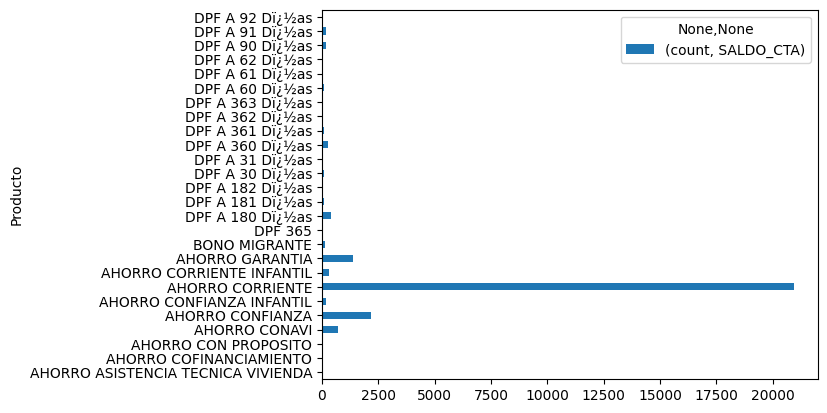

In [233]:
x.plot(kind='barh')

In [235]:
x.describe()

,count
,SALDO_CTA
count,26.000000
mean,1054.192308
std,4089.796494
min,1.000000
25%,12.250000
50%,98.000000
75%,236.250000
max,20961.000000
